## CSV 1 - CONSUMO ENERGIA


### VARIÁVEIS CATEGÓRICAS

DATA; ENERGIA ELETRICA EM KWH

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
from collections import Counter
import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

sns.set_context('notebook')
sns.set_style('darkgrid')


In [4]:
data = 'ipeadata_consumo_energia.csv'

In [5]:
# read the data from a csv file into a pandas dataframe remove the first row and the last column
df = pd.read_csv(data, sep=';', skiprows=0)

In [6]:
print(df.isnull().values.any())

True


In [7]:
data_dia = pd.Series(df['Data'])
consumo = pd.Series(df['Energia elétrica - consumo - residência - quantidade - GWh - Eletrobras - ELETRO12_CEERES12'])

df = pd.DataFrame({'Data': data_dia, 'Consumo': consumo})



In [8]:
df.head()

,Data,Consumo
0,1976.01,"1259,8"
1,1976.02,"1161,6"
2,1976.03,"1191,6"
3,1976.04,"1180,4"
4,1976.05,"1205,2"


In [9]:
df["Data"] = df["Data"].astype(str)

In [10]:
df[['Ano', 'Mes']] = df['Data'].str.split('.', expand=True)


In [11]:
df['AnoMes'] = pd.to_datetime(df['Ano'] + df['Mes'], format='%Y%m')
df['AnoMes'].dtype

dtype('<M8[ns]')

In [12]:
# set the index of the dataframe to be the column 'AnoMes'
df.set_index('AnoMes', inplace=True)

In [13]:
df.head()

,Data,Consumo,Ano,Mes
AnoMes,,,,
1976-01-01,1976.01,"1259,8",1976,01
1976-02-01,1976.02,"1161,6",1976,02
1976-03-01,1976.03,"1191,6",1976,03
1976-04-01,1976.04,"1180,4",1976,04
1976-05-01,1976.05,"1205,2",1976,05


In [14]:
df.drop('Data', axis=1, inplace=True)

In [15]:
#create a filter that will convert the , to . and then convert the column to flo
df['Consumo'] = df['Consumo'].str.replace(',', '.').astype(float)

In [16]:
df['Consumo'].dtype

dtype('float64')

In [17]:
# convert the column anomes to a datetime object
df.index = pd.to_datetime(df.index)

In [18]:
df['Ano'] = pd.to_numeric(df['Ano'])
df['Mes'] = pd.to_numeric(df['Mes'])

In [19]:
df.dtypes

Consumo    float64
Ano          int64
Mes          int64
dtype: object

In [20]:
print(df["Consumo"].mean())

6302.118425760286


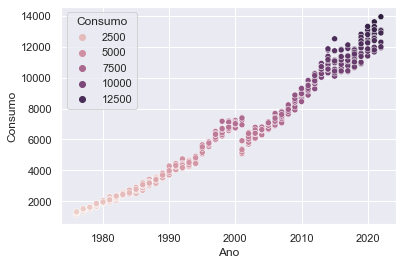

In [21]:
sns.scatterplot(x='Ano', y='Consumo', data=df, hue='Consumo', sizes=(20, 200));



<AxesSubplot:ylabel='Frequency'>

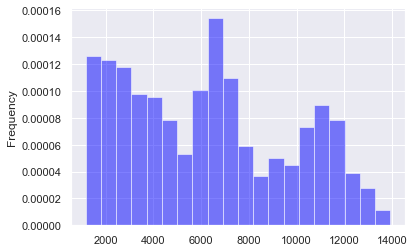

In [22]:
df['Consumo'].plot(kind='hist', bins=20, density=True, alpha=0.5, color='blue')

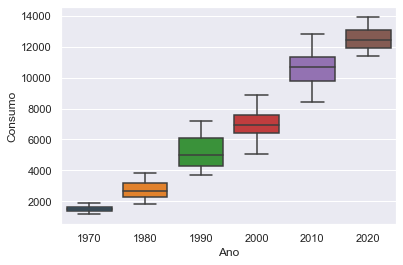

In [25]:
sns.boxplot(x=df['Ano']//10 * 10, y='Consumo', data=df);


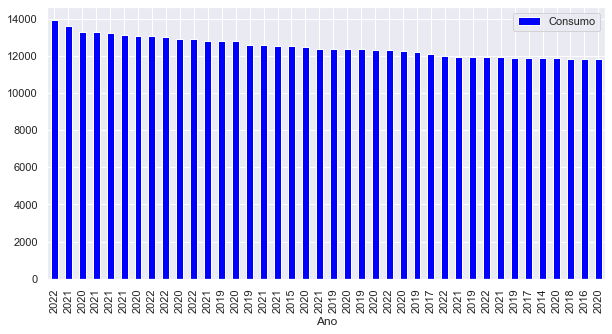

In [34]:
df.sort_values('Consumo', ascending=False).head(40).plot(kind='bar', x='Ano', y='Consumo', color='blue', figsize=(10, 5));


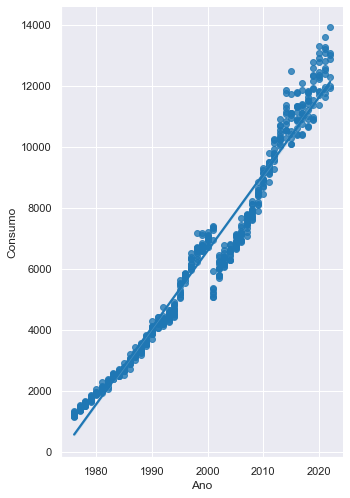

In [28]:

df.nlargest(20, 'Consumo')['Ano']
sns.pairplot(df, x_vars=['Ano'], y_vars='Consumo', height=7, aspect=0.7, kind='reg');

In [36]:
df.shape
numero_total = df.shape[0]

(559, 3)

In [47]:
trace0 = go.Histogram(
    x= np.log(df.Consumo),
    histnorm='probability',
    autobinx= True,
    autobiny=True)

data = [trace0]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [48]:
df.describe()

,Consumo,Ano,Mes
count,559.000000,559.000000,559.000000
mean,6302.118426,1998.794275,5.728086
std,3440.100069,13.460905,3.578277
min,1161.600000,1976.000000,1.000000
25%,3212.000000,1987.000000,2.500000
50%,6215.000000,1999.000000,5.000000
75%,9144.000000,2010.000000,8.000000
max,13926.000000,2022.000000,12.000000


In [46]:
stat, p = stats.shapiro(np.log(df['Consumo']+1).sample(500, random_state=42))

print("Shapiro stat:", stat)
print("P-value: ", p)

if p >= .01:
    print('Normal Distribution')
else:
    print("Non-Normal Distribution")

Shapiro stat: 0.943160355091095
P-value:  6.554496528865528e-13
Non-Normal Distribution
